# DVD Rental Visualization
Nama: **Steven Soewignjo**

Kode Peserta: **070**

Institusi: **Universitas Airlangga**

NIM: **082011833060**


In [1]:
# Import Packages
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import geopandas as gpd

import psycopg2


In [2]:
# Connect to the database to dvdrental
conn = psycopg2.connect(
    host="localhost",
    port="5432",
    database="dvdrental",
    user="postgres",
    password="061201"
)

In [3]:
# Define a cursor to work with
cursor = conn.cursor()

# 1. Identify the top 10 customers and their email so we can reward them

## Query and Save to Data Frame

In [4]:
# Querying Data
## Query
query = """
SELECT c.customer_id, c.first_name, c.last_name, c.email, total_spent
FROM customer c
JOIN (
    SELECT customer_id, SUM(amount) AS total_spent
    FROM payment
    GROUP BY customer_id
    ORDER BY total_spent DESC
    LIMIT 10
) AS top_customers ON c.customer_id = top_customers.customer_id
ORDER BY top_customers.total_spent DESC;
"""

# Execute the query
cursor.execute(query)

# Save the result to data variable
data = cursor.fetchall()

# Create DataFrame
df = pd.DataFrame(data, columns=[
    'customer_id',
    'first_name',
    'last_name',
    'email',
    'total_spent',
])


In [5]:
# Display the query result
df

,customer_id,first_name,last_name,email,total_spent
0,148,Eleanor,Hunt,eleanor.hunt@sakilacustomer.org,211.55
1,526,Karl,Seal,karl.seal@sakilacustomer.org,208.58
2,178,Marion,Snyder,marion.snyder@sakilacustomer.org,194.61
3,137,Rhonda,Kennedy,rhonda.kennedy@sakilacustomer.org,191.62
4,144,Clara,Shaw,clara.shaw@sakilacustomer.org,189.60
5,459,Tommy,Collazo,tommy.collazo@sakilacustomer.org,183.63
6,181,Ana,Bradley,ana.bradley@sakilacustomer.org,167.67
7,410,Curtis,Irby,curtis.irby@sakilacustomer.org,167.62
8,236,Marcia,Dean,marcia.dean@sakilacustomer.org,166.61
9,403,Mike,Way,mike.way@sakilacustomer.org,162.67


## Query result visualization

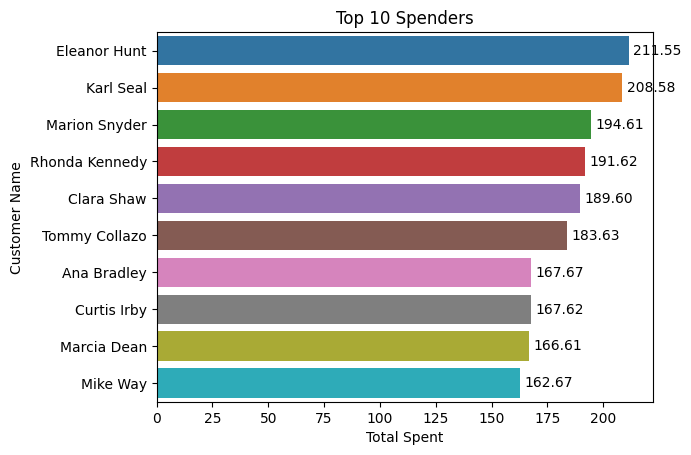

In [6]:
df['full_name'] = df['first_name'].str.cat(df['last_name'], sep=' ')

# Create a bar plot using Seaborn
ax = sns.barplot(x='total_spent', y='full_name', data=df)

# Add value labels to the bars
for i, v in enumerate(df['total_spent']):
    ax.text(v + 2, i, str(v), color='black', va='center')

# Set plot labels and title
plt.xlabel('Total Spent')
plt.ylabel('Customer Name')
plt.title('Top 10 Spenders')

# Show the plot
plt.show()

# 2. Identify the bottom 10 customers and their emails

## Query and Save to Data Frame

In [7]:
# Querying Data
## Query
query = """
SELECT c.customer_id, c.first_name, c.last_name, c.email, total_spent
FROM customer c
JOIN (
    SELECT customer_id, SUM(amount) AS total_spent
    FROM payment
    GROUP BY customer_id
    ORDER BY total_spent ASC
    LIMIT 10
) AS bottom_customers ON c.customer_id = bottom_customers.customer_id
ORDER BY bottom_customers.total_spent ASC;
"""

# Execute the query
cursor.execute(query)

# Save the result to data variable
data = cursor.fetchall()

# Create DataFrame
df = pd.DataFrame(data, columns=[
    'customer_id',
    'first_name',
    'last_name',
    'email',
    'total_spent',
])

In [8]:
# Display the query result
df

,customer_id,first_name,last_name,email,total_spent
0,318,Brian,Wyman,brian.wyman@sakilacustomer.org,27.93
1,281,Leona,Obrien,leona.obrien@sakilacustomer.org,32.90
2,248,Caroline,Bowman,caroline.bowman@sakilacustomer.org,37.87
3,320,Anthony,Schwab,anthony.schwab@sakilacustomer.org,47.85
4,110,Tiffany,Jordan,tiffany.jordan@sakilacustomer.org,49.88
5,586,Kirk,Stclair,kirk.stclair@sakilacustomer.org,50.83
6,288,Bobbie,Craig,bobbie.craig@sakilacustomer.org,52.81
7,250,Jo,Fowler,jo.fowler@sakilacustomer.org,54.85
8,271,Penny,Neal,penny.neal@sakilacustomer.org,56.84
9,395,Johnny,Turpin,johnny.turpin@sakilacustomer.org,57.81


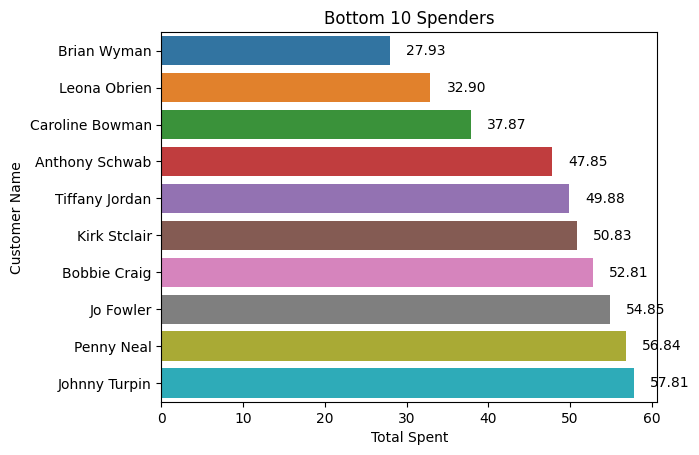

In [9]:
df['full_name'] = df['first_name'].str.cat(df['last_name'], sep=' ')

# Create a bar plot using Seaborn
ax = sns.barplot(x='total_spent', y='full_name', data=df)

# Add value labels to the bars
for i, v in enumerate(df['total_spent']):
    ax.text(v + 2, i, str(v), color='black', va='center')

# Set plot labels and title
plt.xlabel('Total Spent')
plt.ylabel('Customer Name')
plt.title('Bottom 10 Spenders')

# Show the plot
plt.show()

# 3. What are the most profitable movie genres (ratings)? 

In [10]:
# Querying Data
## Query
query = """
SELECT f.rating, SUM(p.amount) AS genre_revenue FROM film f
JOIN inventory inv ON f.film_id = inv.film_id
JOIN rental r ON inv.inventory_id = r.inventory_id
JOIN payment p ON r.customer_id = p.customer_id
GROUP BY f.rating
ORDER BY genre_revenue DESC;
"""

# Execute the query
cursor.execute(query)

# Save the result to data variable
data = cursor.fetchall()

# Create DataFrame
df = pd.DataFrame(data, columns=[
    'rating',
    'genre_revenue',
])

In [11]:
# Display the query result
df

,rating,genre_revenue
0,PG-13,381421.55
1,NC-17,347723.95
2,PG,342988.86
3,R,339196.28
4,G,294216.21


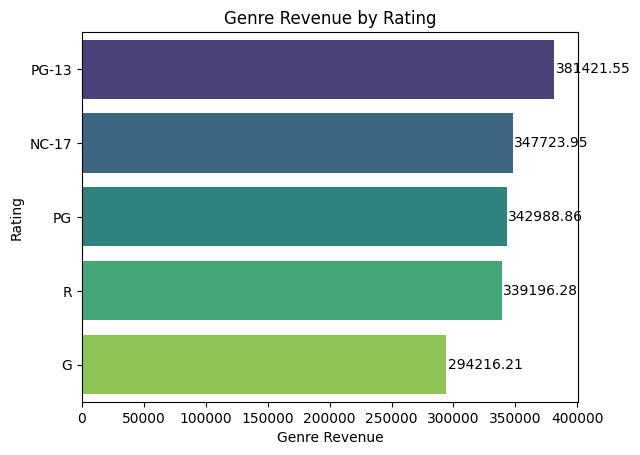

In [12]:
# Create a bar plot using Seaborn
ax = sns.barplot(x='genre_revenue', y='rating', data=df, palette='viridis')

# Add value labels inside the bars
for i, v in enumerate(df['genre_revenue']):
    ax.text(v + 1000, i, f'{v:.2f}', color='black', va='center')

# Set plot labels and title
plt.xlabel('Genre Revenue')
plt.ylabel('Rating')
plt.title('Genre Revenue by Rating')

# Show the plot
plt.show()

# 4. How many rented movies were returned late, early, and on time?

In [13]:
# Querying Data
## Query
query = """
SELECT  COUNT(CASE WHEN rental.return_date > rental.rental_date + film.rental_duration * INTERVAL '1 day' THEN 1 END) AS late_returns,
COUNT(CASE WHEN rental.return_date < rental.rental_date + film.rental_duration * INTERVAL '1 day' THEN 1 END) AS early_returns,
COUNT(CASE WHEN rental.return_date = rental.rental_date + film.rental_duration * INTERVAL '1 day' THEN 1 END) AS on_time_returns
FROM rental
JOIN inventory ON rental.inventory_id = inventory.inventory_id
JOIN film ON inventory.film_id = film.film_id;
"""

# Execute the query
cursor.execute(query)

# Save the result to data variable
data = cursor.fetchall()

# Create DataFrame
df = pd.DataFrame(data, columns=[
    'late_returns',
    'early_returns',
    'on_time_returns',
])

In [14]:
# Display the query result
df

,late_returns,early_returns,on_time_returns
0,8121,7738,2


In [15]:
# Change the layout of the DataFrame
df = df.melt(var_name='return_status', value_name='count')
df

,return_status,count
0,late_returns,8121
1,early_returns,7738
2,on_time_returns,2


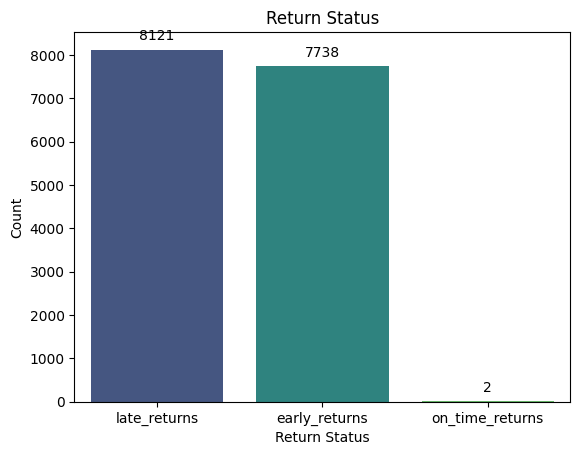

In [16]:
# Create a grouped bar plot using Seaborn
ax = sns.barplot(x='return_status', y='count', data=df, palette='viridis')

# Add value labels on top of the bars
for p in ax.patches:
    ax.annotate(format(p.get_height(), '.0f'), (p.get_x() + p.get_width() / 2., p.get_height()),
                ha = 'center', va = 'center', xytext = (0, 10), textcoords = 'offset points')

# Set plot labels and title
plt.xlabel('Return Status')
plt.ylabel('Count')
plt.title('Return Status')

# Show the plot
plt.show()

# 5. What is the customer base in the countries where we have a presence?

In [17]:
# Querying Data
## Query
query = """
SELECT dco.country, COUNT(dco.country) FROM customer c
JOIN address addr ON c.address_id = addr.address_id
JOIN city dc ON addr.city_id = dc.city_id
JOIN country dco ON dc.country_id = dco.country_id
GROUP BY dco.country
ORDER BY COUNT(dco.country) DESC;
"""

# Execute the query
cursor.execute(query)

# Save the result to data variable
data = cursor.fetchall()

# Create DataFrame
df = pd.DataFrame(data, columns=[
    'country',
    'customer_count'
])

In [18]:
# Display the query result
df

,country,customer_count
0,India,60
1,China,53
2,United States,36
3,Japan,31
4,Mexico,30
...,...,...
103,Anguilla,1
104,Brunei,1
105,Tonga,1
106,Nepal,1


C:\Users\Steven\AppData\Local\Temp\ipykernel_16364\85700753.py:2: FutureWarning: The geopandas.dataset module is deprecated and will be removed in GeoPandas 1.0. You can get the original 'naturalearth_lowres' data from https://www.naturalearthdata.com/downloads/110m-cultural-vectors/.
  world = gpd.read_file(gpd.datasets.get_path('naturalearth_lowres'))


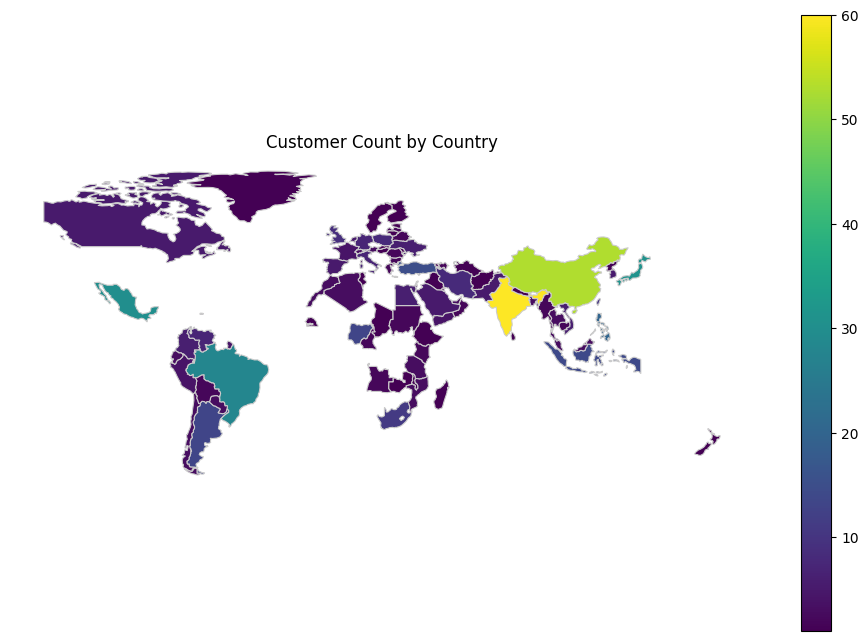

In [19]:
# Read the world shapefile
world = gpd.read_file(gpd.datasets.get_path('naturalearth_lowres'))

# Merge the world shapefile with the data DataFrame
world = world.merge(df, left_on='name', right_on='country')

# Create a figure and axis
fig, ax = plt.subplots(figsize=(12, 8))

# Plot the world map
world.plot(column='customer_count', cmap='viridis', linewidth=0.8, ax=ax, edgecolor='0.8', legend=True)

# Remove axis ticks and labels
ax.set_xticks([])
ax.set_yticks([])
ax.axis('off')

# Set plot title
plt.title('Customer Count by Country')


# Add a legend
sm = plt.cm.ScalarMappable(cmap='viridis')
sm.set_array(df['customer_count'])

# Show the plot
plt.show()

# 6. Which country is the most profitable for the business?

In [20]:
# Querying Data
## Query
query = """
SELECT co.country, SUM(p.amount) as total_paid
FROM payment p
JOIN customer c ON p.customer_id = c.customer_id
JOIN address a ON c.address_id = a.address_id
JOIN city ci ON a.city_id = ci.city_id
JOIN country co ON ci.country_id = co.country_id
GROUP BY co.country
ORDER BY total_paid DESC;
"""

# Execute the query
cursor.execute(query)

# Save the result to data variable
data = cursor.fetchall()

# Create DataFrame
df = pd.DataFrame(data, columns=[
    'country',
    'total_paid'
])

In [21]:
# Display the query result
df

,country,total_paid
0,India,6034.78
1,China,5251.03
2,United States,3685.31
3,Japan,3122.51
4,Mexico,2984.82
...,...,...
103,Afghanistan,67.82
104,Tonga,64.84
105,Saint Vincent and the Grenadines,64.82
106,Lithuania,63.78


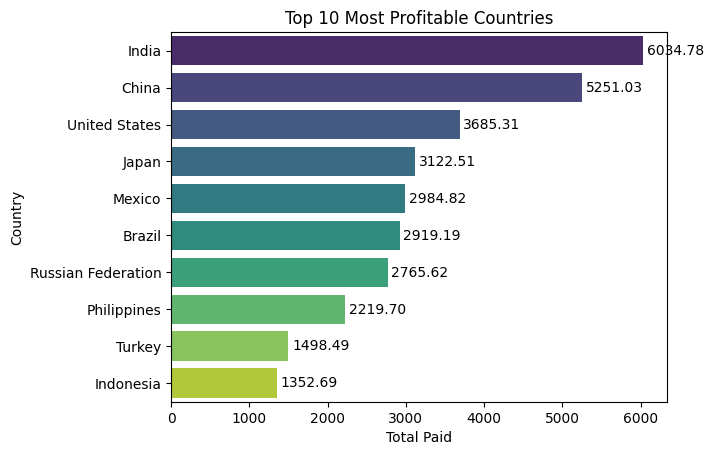

In [22]:
# Sort the DataFrame by 'total_paid' in descending order
df_sorted = df.sort_values('total_paid', ascending=False).head(10)

# Create a bar plot using Seaborn
ax = sns.barplot(x='total_paid', y='country', data=df_sorted, palette='viridis')

# Add value labels on the bars
for i, v in enumerate(df_sorted['total_paid']):
    ax.text(v + 50, i, f'{v:.2f}', color='black', va='center')

# Set plot labels and title
plt.xlabel('Total Paid')
plt.ylabel('Country')
plt.title('Top 10 Most Profitable Countries')

# Show the plot
plt.show()

# 7. What is the average rental rate per movie genre (rating)?

In [23]:
# Querying Data
## Query
query = """
SELECT rating, CAST(AVG(rental_rate) AS DECIMAL(5, 2)) AS average_rental_rate
FROM film
GROUP BY rating
ORDER BY average_rental_rate DESC;
"""

# Execute the query
cursor.execute(query)

# Save the result to data variable
data = cursor.fetchall()

# Create DataFrame
df = pd.DataFrame(data, columns=[
    'rating',
    'average_rental_rate'
])

In [24]:
# Display the query result
df

,rating,average_rental_rate
0,PG,3.05
1,PG-13,3.03
2,NC-17,2.97
3,R,2.94
4,G,2.89


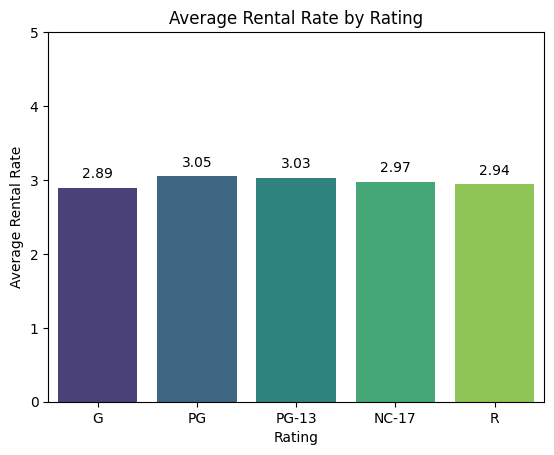

In [25]:
rating_order = ['G', 'PG', 'PG-13', 'NC-17', 'R']

# Create a bar plot using Seaborn
ax = sns.barplot(x='rating', y='average_rental_rate', data=df, palette='viridis', order=rating_order)

# Set the y-axis limits to 0 and 5
ax.set_ylim(0, 5)

# Add value labels on the bars
for p in ax.patches:
    height = p.get_height()
    ax.annotate(f'{height:.2f}', xy=(p.get_x() + p.get_width() / 2, height), xytext=(0, 5),
                textcoords="offset points", ha='center', va='bottom')

# Set plot labels and title
plt.xlabel('Rating')
plt.ylabel('Average Rental Rate')
plt.title('Average Rental Rate by Rating')

# Show the plot
plt.show()